# Airbnb Project

## Introduction

As someone who has a passion for travelling, Airbnb has been a crucial part in budgeting. It has become a common occurrence during my travels that I opt to stay at an Airbnb instead of a hotel due to their lower cost. In this project I will be viewing Airbnb listings in Stockholm. The Data was accessed through insideairbnb.com and the date of the data scraping was 29th of June, 2024.
Data was preprocessed on Excel PowerQuery as data types had to be redetected after minor changes, some columns had to be removed and blanks as well as N/As had to be converted into nulls.

#### Project questions:

- Is there a correlation between location and price?

    - If so, how much does the location affect price. 

- What is the average price of an Airbnb in Stockholm?

    - Which neighbourhood is the most expensive?

    - Which room type is the most expensive?

- Does the maximum capacity increase price?

    - If so, how much does it affect the price?

- Does superhost status affect the price?

    - If so, how much does it affect the price?

- Does superhost status affect the amount of reviews?

- What are the average ratings for each review category?

- Does superhost status affect the ratings?

- Does host not being verified affect the ratings?

- Does price affect the ratings?

## Data analysis

Data analysis will be conducted using R as a Jupyter notebook kernel.

#### Installing packages

Firstly, I will be installing all of the necessary packages for this data analysis.

In [35]:
#install.packages("openxlsx")
#install.packages("Hmisc")
#install.packages("htmltools")
#install.packages("ggplot2")
#install.packages("dplyr")
library(openxlsx)
library(Hmisc)
library(htmltools)
library(ggplot2)
library(dplyr)

#### Importing data and checking its contents

I will be then importing the data into R from an Excel file I have preprocessed in Power Query.

In [23]:
data <- read.xlsx("C:/Users/Ville/Documents/GitHub/Airbnb Project/Stockholm listings data.xlsx", sheet = 1)
head(data)

,id,name,host_id,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,⋯,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month
,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,32984,"City Hall, Stockholm",53396,Chris,40128,a few days or more,0.0,0,f,1,⋯,4.23,4.43,3.81,4.29,4.52,4.81,4.20,f,1,0.14
2,155220,"Stockholm, new spacoius villa",746396,Madeleine,40720,within a few hours,1.0,1,f,2,⋯,2.00,2.33,2.00,3.67,3.33,4.67,2.33,f,2,0.13
3,164448,Double room in central Stockholm with Wi-Fi,784312,Li,40730,within an hour,1.0,1,t,2,⋯,4.86,4.87,4.79,4.96,4.97,4.83,4.76,f,2,2.64
4,220851,One room in appartement,412283,Fredric,40601,a few days or more,0.2,0,f,2,⋯,4.69,4.69,4.65,4.90,4.87,4.82,4.70,f,1,0.41
5,238411,Cozy apartment in central Stockholm,1250232,Mia,40821,within an hour,1.0,0,f,1,⋯,4.79,4.65,4.71,4.85,4.95,4.85,4.63,f,1,0.72
6,242188,Single room in central Stockholm with Wi-Fi,784312,Li,40730,within an hour,1.0,1,t,2,⋯,4.89,4.88,4.84,4.96,4.97,4.88,4.84,f,2,2.68


In [24]:
output <- capture.output(describe(data))
html_output <- tags$div(style = "height: 400px; overflow-y: scroll; white-space: pre;", paste(output, collapse = "\n"))
browsable(html_output)

Shiny tags cannot be represented in plain text (need html)

As we can see all of the data is as it is supposed to be. There are 41 columns and 5400 rows in this dataset. This means that this dataset contains 5400 listings.

#### Q1: Is there a correlation between location and price?

We do this by using ANOVA test. My hypothesis is that there is a significant relationship between location and price at a 95% confidence level. This means that there is atleast a 95% chance of location affecting the price. 1380 observations were deleted due to them missing a value in the price column. 

In [26]:
data$neighbourhood_factor <- as.factor(data$neighbourhood)
anova_result <- aov(price ~ neighbourhood_factor, data = data)
summary(anova_result)

                       Df    Sum Sq   Mean Sq F value Pr(>F)  
neighbourhood_factor   13 1.545e+09 118883382   1.856 0.0303 *
Residuals            4006 2.566e+11  64048182                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
1380 observations deleted due to missingness

As we can see from the results above, the P-value (0.0303) is lower than 0.05. This means that my hypothesis was correct. It is likely that the location affects price.

#### If so, how much does the location affect price. 

To see how much the location affects the prices, we can plot the locations by their mean prices as a bar chart.

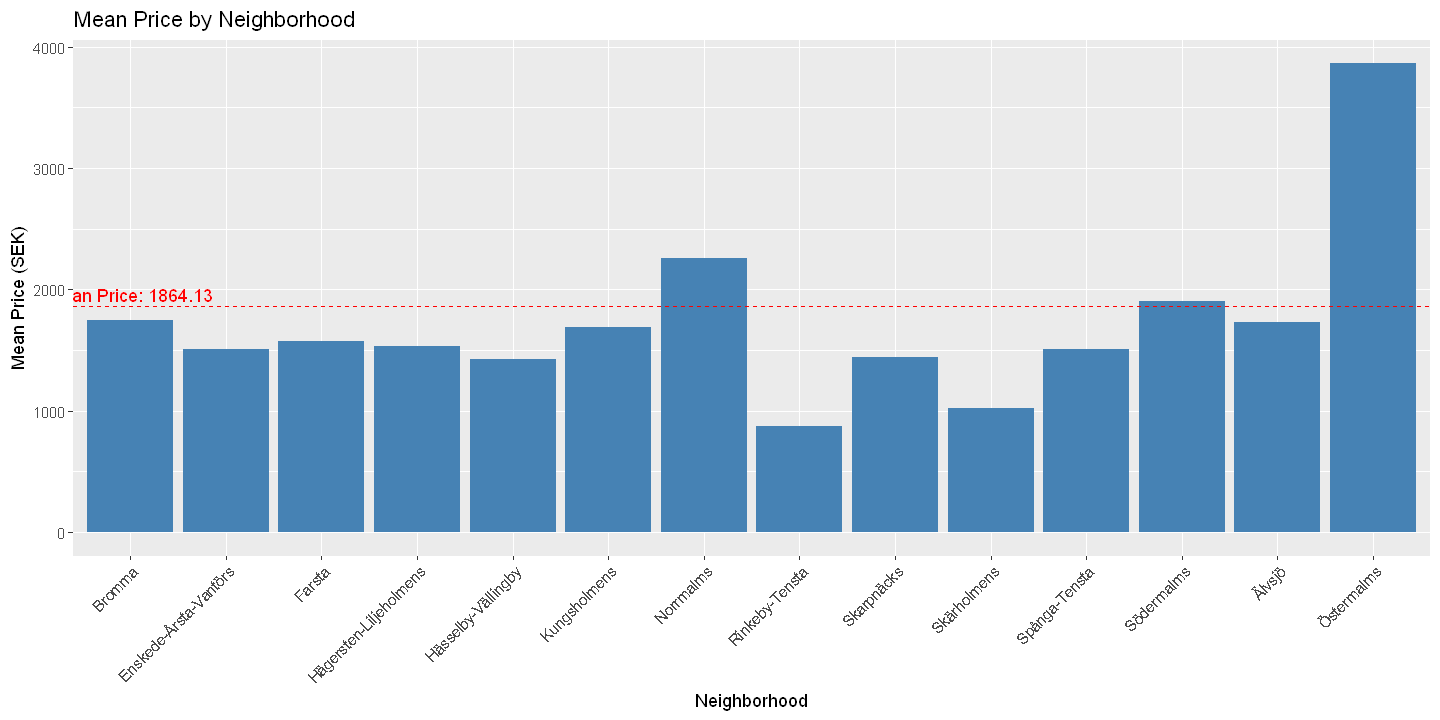

In [41]:
average_price <- mean(data$price, na.rm = TRUE)

mean_price_by_neighbourhood <- data %>%
  group_by(neighbourhood_factor) %>%
  summarise(price = mean(price, na.rm = TRUE), .groups = 'drop')

ggplot(mean_price_by_neighbourhood, aes(x = neighbourhood_factor, y = price)) +
  geom_bar(stat = "identity", fill = "steelblue") +  
  labs(title = "Mean Price by Neighborhood", 
       x = "Neighborhood", 
       y = "Mean Price (SEK)") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) + 
  geom_hline(yintercept = average_price, linetype = "dashed", color = "red") +  
  annotate("text", x = 1, y = average_price + 100, 
           label = paste("Mean Price:", round(average_price, 2)), 
           color = "red") 

From the plot above we can see that the price does in fact change between the locations, but the price difference is not great besides a few areas. The notable areas are Östermalms and Norrmalms as the expensive ones. Östermalms having a mean of almost 4000 SEK and Norrmalms around 2250 SEK. Rinkeby-Tensta and Skärholmens stand out as the cheapest areas. 

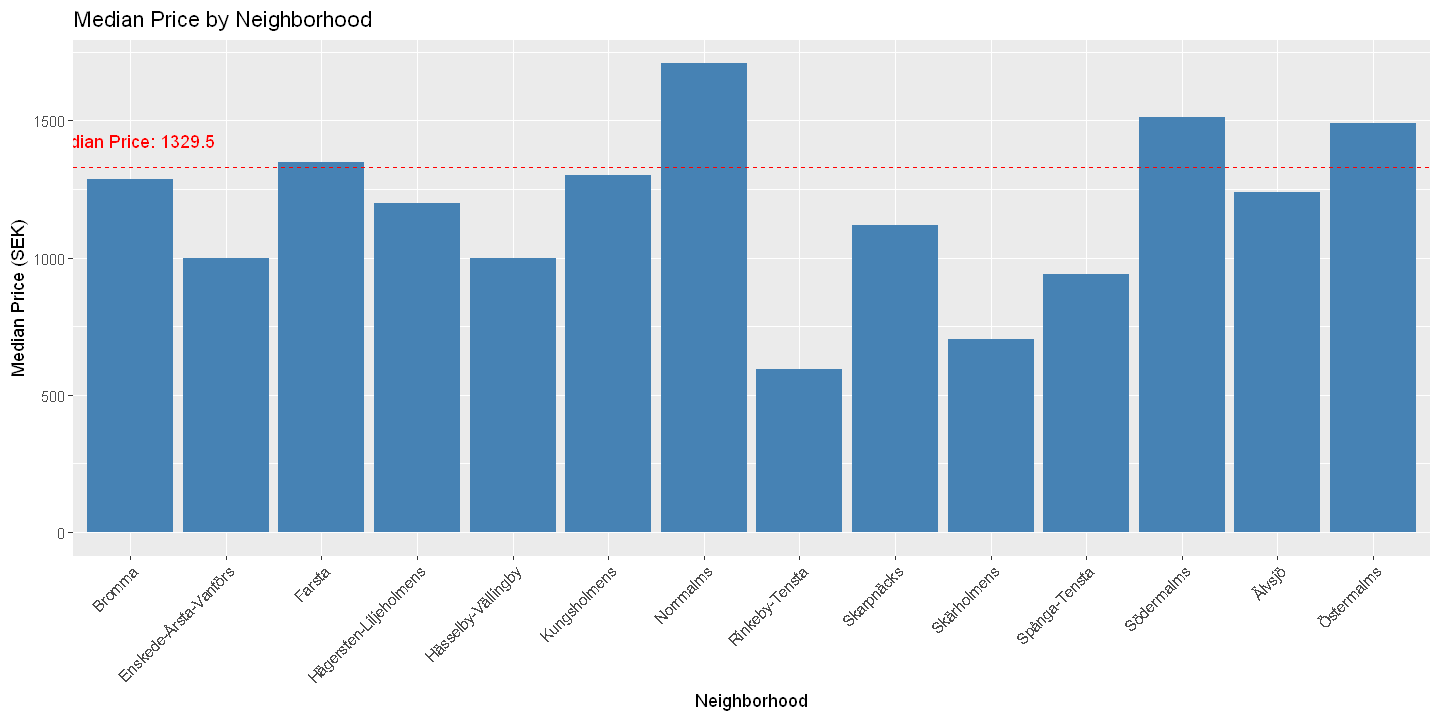

In [42]:
median_price <- median(data$price, na.rm = TRUE)

median_price_by_neighbourhood <- data %>%
  group_by(neighbourhood_factor) %>%
  summarise(price = median(price, na.rm = TRUE), .groups = 'drop')

ggplot(median_price_by_neighbourhood, aes(x = neighbourhood_factor, y = price)) +
  geom_bar(stat = "identity", fill = "steelblue") +  
  labs(title = "Median Price by Neighborhood", 
       x = "Neighborhood", 
       y = "Median Price (SEK)") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) + 
  geom_hline(yintercept = median_price, linetype = "dashed", color = "red") +  
  annotate("text", x = 1, y = median_price + 100, 
           label = paste("Median Price:", round(median_price, 2)), 
           color = "red") 

As we can see, Östermalms is only the third most expensive based on its median price. This difference between the mean plot, is most likely due to some extremely high values skewing the average price of the area. Norrmalms still stands out as an expensive area compared to the rest. Södermalms appears to be the second most expensive area based on the median value, just slightly above Östremalms. Rinkeby-Tensta and Skärholmens are yet again the stand out cheaper areas.

As we are on the topic of neighbourhoods, lets see which neighbourhoods have the most Airbnb listings.

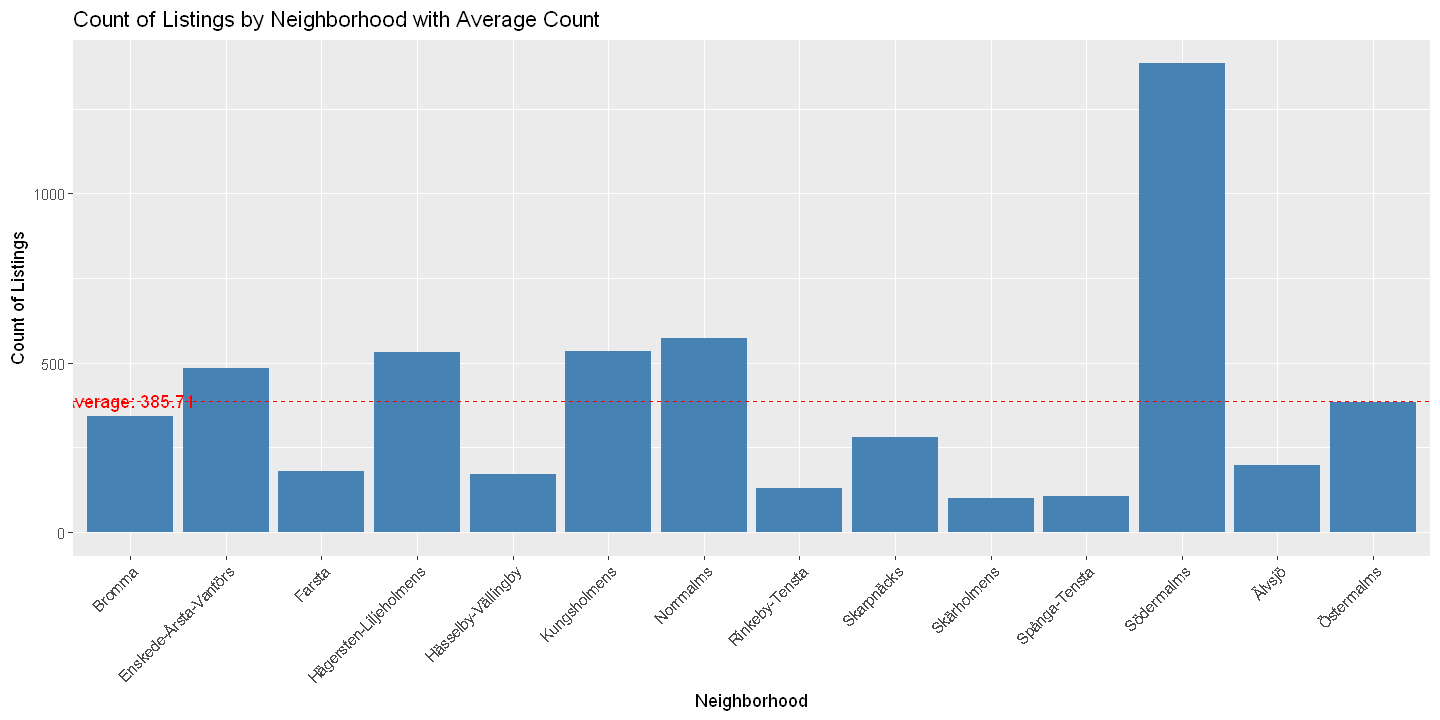

In [38]:
count_data <- data %>%
  group_by(neighbourhood_factor) %>%
  summarise(count = n(), .groups = 'drop')

average_count <- mean(count_data$count)

ggplot(count_data, aes(x = neighbourhood_factor, y = count)) +
  geom_bar(stat = "identity", fill = "steelblue") + 
  geom_hline(yintercept = average_count, linetype = "dashed", color = "red") + 
  labs(title = "Count of Listings by Neighborhood with Average Count", 
       x = "Neighborhood", 
       y = "Count of Listings") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  annotate("text", x = 1, y = average_count + 5, 
           label = paste("Average:", round(average_count, 2)), 
           color = "red")

Södermalms stands far above the other neighbourhoods based on the count of listings. The average amount of listings in a neighbourhood is around 386, but as we can see, over half of the neighbourhoods are placed below the mean line. 